In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
data=pd.read_csv('spam.csv', sep=',',encoding='latin-1')

In [22]:
df=data[["v1","v2"]]

In [24]:
df.columns=['Labels','Messages']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [30]:
import nltk
import re

In [28]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [29]:
ps=PorterStemmer()
corpus=[]

In [35]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Messages'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [37]:
#corpus

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
#max features is used to limit the number of itmes we want
cv=CountVectorizer(max_features=5000)

In [45]:
X=cv.fit_transform(corpus).toarray()

In [46]:
X.shape

(5572, 5000)

In [52]:
y=pd.get_dummies(df['Labels'])

In [53]:
y=y.iloc[:,1].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [60]:
y_pred=spam_detect_model.predict(X_test)

In [65]:

from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [66]:
cv=confusion_matrix(y_pred,y_test)

Text(33.0, 0.5, 'Y_Pred')

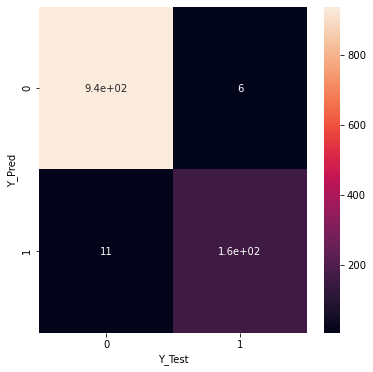

In [78]:
plt.figure(figsize=(6,6))
sns.heatmap(cv,annot=True)
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')

In [80]:
df['Messages'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Messages, dtype: object